### Q. 정류장 별 나가고 들어오는 자전거 수가 비슷한지?

- 자전거의 출입의 수가 동일하면 따로 개입이 필요 없지만, 한 구역에서 빠져나가는 수가 많거나 들어오는 수가 많으면 자전거를 직접 옮겨줘야한다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

journeys = pd.read_csv('journeys.csv')
stations = pd.read_csv('stations.csv')

print(journeys.shape)
print(stations.shape)

journeys.head(2)

(1542844, 14)
(773, 5)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550


In [2]:
stations.head(2)

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"


In [3]:
# 끝 정류장에 대한 정보를 journeys에 추가
data = pd.merge(journeys, stations, left_on = 'End Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 End Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# 시작 정류장에 대한 정보도 추가해야되기 때문에 Column값 변경
data.rename(columns={"Capacity":"End Capacity", "Latitude":"End Latitude", "Longitude":"End Longitude", "Station Name":"End Station Name"},inplace = True)

# 시작 정류장에 대한 정보를 journeys에 추가
data = pd.merge(data, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 Start Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# Column값 변경
data.rename(columns={"Capacity":"Start Capacity", "Latitude":"Start Latitude", "Longitude":"Start Longitude", "Station Name":"Start Station Name"},inplace = True)

# 최종 데이터
print(data.shape)
data.head(2)

(1542844, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
0,2040.0,953,19,9,17,18,0,478,19,9,...,26,251,21.0,51.521889,-0.046670,"Stepney Green Station, Stepney",34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street"
1,1800.0,12581,19,9,17,15,21,122,19,9,...,51,550,23.0,51.521113,-0.078869,"Norton Folgate, Liverpool Street",23.0,51.521564,-0.039264,"Harford Street, Mile End"


In [4]:
# 정류장별 나가는 수
pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count').head(2)

,Journey Duration
Start Station ID,
1,1269
2,2055


In [5]:
# 정류장별 들어오는 수
pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count').head(2)

,Journey Duration
End Station ID,
1,877
2,2379


In [6]:
# 정류장별 나가는 수 - 정류장별 들어오는 수
data_1 = pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count') - pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count')
data_1 = data_1.rename(columns = {'Journey Duration' : 'Number of bicycles'})
data_1.head(2)

,Number of bicycles
Start Station ID,
1,392
2,-324


In [7]:
data_1.describe()

,Number of bicycles
count,779.000000
mean,0.000000
std,294.470925
min,-3186.000000
25%,-59.000000
50%,12.000000
75%,93.000000
max,2005.000000


In [8]:
result = pd.merge(data_1, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

result.head(2)

,Number of bicycles,Station ID,Capacity,Latitude,Longitude,Station Name
0,392,1.0,19.0,51.529163,-0.109970,"River Street , Clerkenwell"
1,-324,2.0,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington"


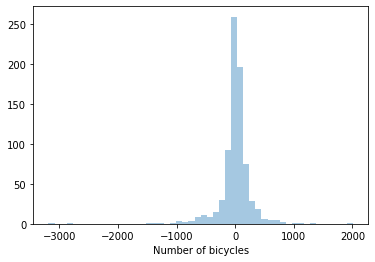

In [9]:
sns.distplot(result['Number of bicycles'],kde=False, rug=False)

#### 자전거의 출입수가 대략적으로 정규분포와 유사하다는 것을 알 수 있다.

####  그래도 몇 정류장은 0과 거리가 있다.

#### 평균에서 1시그마 밖에 있는 데이터를 확인해보자.

In [10]:
result.to_csv('result.csv')

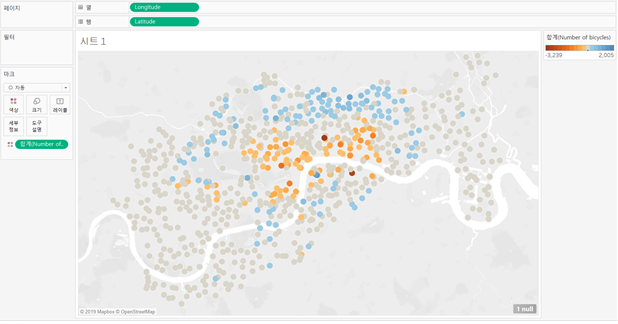

- 위도 경도에 따른 정류장 위치를 표시해주었고 정류장별 출입의 수로 색을 입혔습니다.

- 회색 : 나가고 들어오는 수가 거의 동일한 정류장

- 파란색 : 나가는 수가 더 많은 정류장

- 빨간색 : 들어오는 수가 더 많은 정류장

### 위의 그래프를 봤을 떄 런던 외곽에서 중심으로 많이 움직일거라는 가정을 할 수가 있습니다.

#### - 위의 가정을 확인해보기 위해 아래 두가지를 확인 해보겠습니다.



#### 1) 나가는 수가 많은 정류장의 최종 목적지(파란색 정류장들의 최종 목적지)

#### 2) 들어오는 수가 많은 정류장의  출발 정류장(빨간 정류장들의 출발지)

In [11]:
# 평균을 기준으로 양 옆으로 1시그마 밖으로 나온 값들의 데이터를 Outlier로 만들었습니다.
Outlier = pd.merge(data_1[data_1['Number of bicycles'].abs() > int(data_1.std()*1)], stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

In [12]:
# 48개의 정류장
Outlier[Outlier['Number of bicycles'] > 0].shape

(48, 6)

In [13]:
data.sort_values(by = 'Start Station ID', inplace = True)

x = list(Outlier[Outlier['Number of bicycles'] > 0]['Station ID'])

def find_Start_Station_ID(data):
    for i in x:
        if data == i:
            return data

Start_Station = data[data['Start Station ID'].apply(find_Start_Station_ID) > 0]

print(Start_Station.shape)
Start_Station.head(2)

(120542, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
1421682,666.0,6856,4,8,17,8,16,275,4,8,...,5,1,19.0,51.520044,-0.092176,"Barbican Centre, Barbican",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
271290,600.0,1872,12,9,17,19,45,427,12,9,...,35,1,43.0,51.513970,-0.092940,"Cheapside, Bank",19.0,51.529163,-0.10997,"River Street , Clerkenwell"


- 위의 48개의 정류장에서 나가는 데이터 수가 120542개

In [14]:
# 최종 목적지를 기준으로 카운트
Start_Station = pd.pivot_table(Start_Station, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count')

Start_Station = pd.merge(Start_Station, stations, left_on = 'End Station ID', right_on = 'Station ID', how = 'left')

Start_Station.rename(columns = {'Journey Duration':'Count'}, inplace = True)

Start_Station.head(2)

,Count,Station ID,Capacity,Latitude,Longitude,Station Name
0,196,1.0,19.0,51.529163,-0.109970,"River Street , Clerkenwell"
1,77,2.0,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington"


In [15]:
Start_Station.to_csv('Start_Station.csv')

In [16]:
Start_Station['Count'].describe()

count     774.000000
mean      155.739018
std       183.065514
min         1.000000
25%        33.000000
50%        93.000000
75%       212.750000
max      1405.000000
Name: Count, dtype: float64

In [17]:
# 55개의 정류장
Outlier[Outlier['Number of bicycles'] < 0].shape

(55, 6)

In [18]:
data.sort_values(by = 'End Station ID', inplace = True)

x = list(Outlier[Outlier['Number of bicycles'] < 0]['Station ID'])

def find_End_Station_ID(data):
    for i in x:
        if data == i:
            return data

End_Station = data[data['End Station ID'].apply(find_End_Station_ID) > 0]

print(End_Station.shape)
End_Station.head(2)

(242066, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
761119,832.0,1981,27,8,17,13,19,2,27,8,...,5,730,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington",18.0,51.492084,-0.229116,"Bridge Avenue, Hammersmith"
524242,600.0,5701,3,9,17,14,27,2,3,9,...,17,36,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington",28.0,51.501737,-0.184980,"De Vere Gardens, Kensington"


- 위의 55개의 정류장으로 들어오는 데이터 수가 242066개

In [19]:
# 시작 목적지를 기준으로 카운트
End_Station = pd.pivot_table(End_Station, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count')

End_Station = pd.merge(End_Station, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

End_Station.rename(columns = {'Journey Duration':'Count'}, inplace = True)

print(End_Station.shape)
End_Station.head(2)

(778, 6)


,Count,Station ID,Capacity,Latitude,Longitude,Station Name
0,277,1.0,19.0,51.529163,-0.109970,"River Street , Clerkenwell"
1,232,2.0,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington"


- 778개의 정류장에서 출발하는 것을 알 수 있다.

In [20]:
End_Station.to_csv('End_Station.csv')

In [21]:
End_Station['Count'].describe()

count     778.000000
mean      311.138817
std       351.510777
min         3.000000
25%        90.250000
50%       214.000000
75%       415.000000
max      4130.000000
Name: Count, dtype: float64

### 1) 자전거의 출입에 따른 색깔 분류
#### 파란색 : 나가는 수가 많은 정류장
#### 빨간색 : 들어오는 수가 많은 정류장
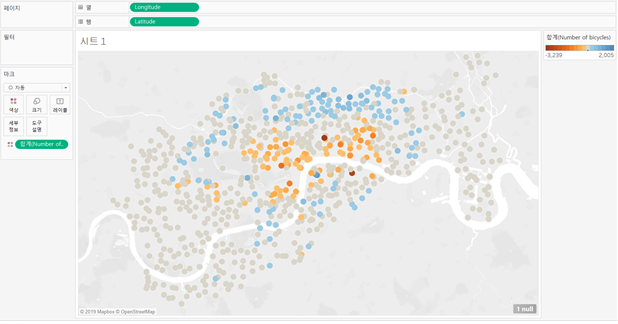

### 2) 나가는 수가 많은 정류장의 최종 목적지
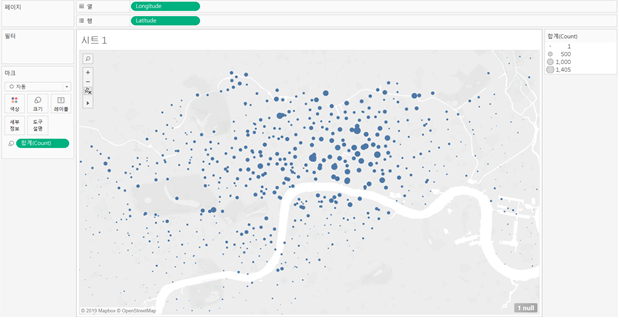

- 1)의 파란색 데이터(나가는 수가 많은 정류장)의 최종 목적지의 그래프가 2)이다.

- 주로 시내쪽으로 오는 것을 볼 수 있다.

### 3) 들어오는 수가 많은 정류장들의 시작지점
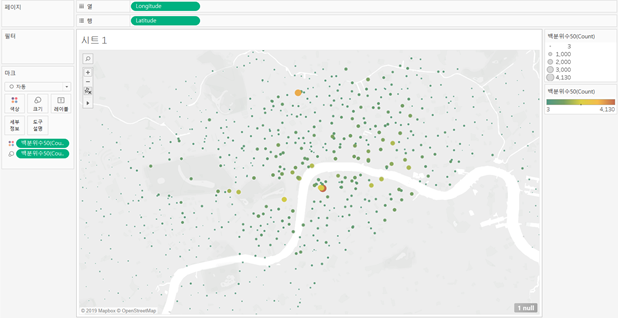

- 1)의 빨간색 데이터(들어오는 수가 많은 정류장)의 시작지점의 그래프가 3)이다.

- 주로 외곽 쪽에 있는 정류장에서 출발하는 것을 볼 수 있다.

#### 따라서 위의 결과를 봤을 때 런던 시내의 자전거를 외곽으로 옮겨줘야한다는 것을 알 수 있다.